In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_excel('Data_clean/Alta_sensors/2P04_combined.xlsx')

In [18]:
df['Count'].max()


1041.0

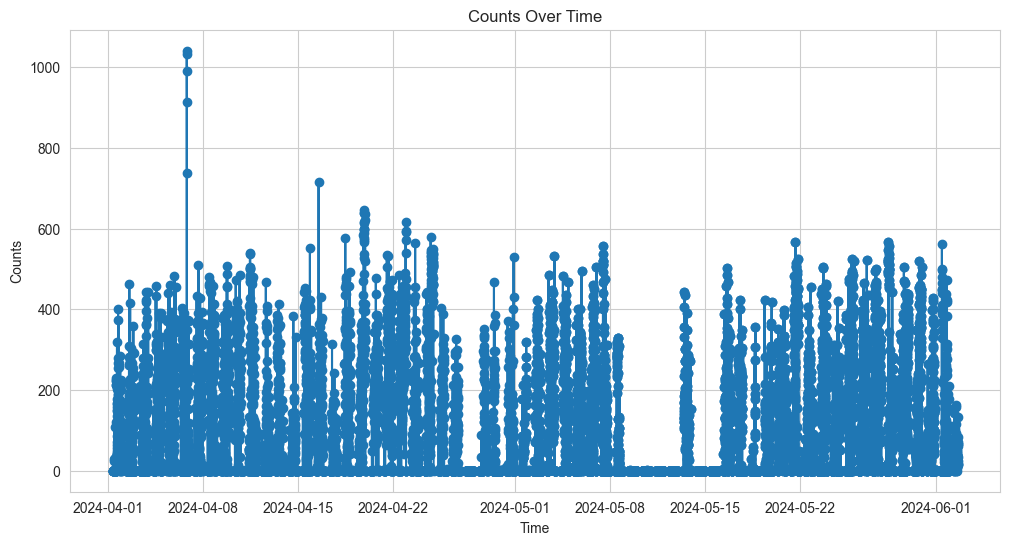

In [19]:
df['Date'] = pd.to_datetime(df['Date'])
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Count'], marker='o')
plt.title('Counts Over Time')
plt.xlabel('Time')
plt.ylabel('Counts')
plt.grid(True)
plt.show()

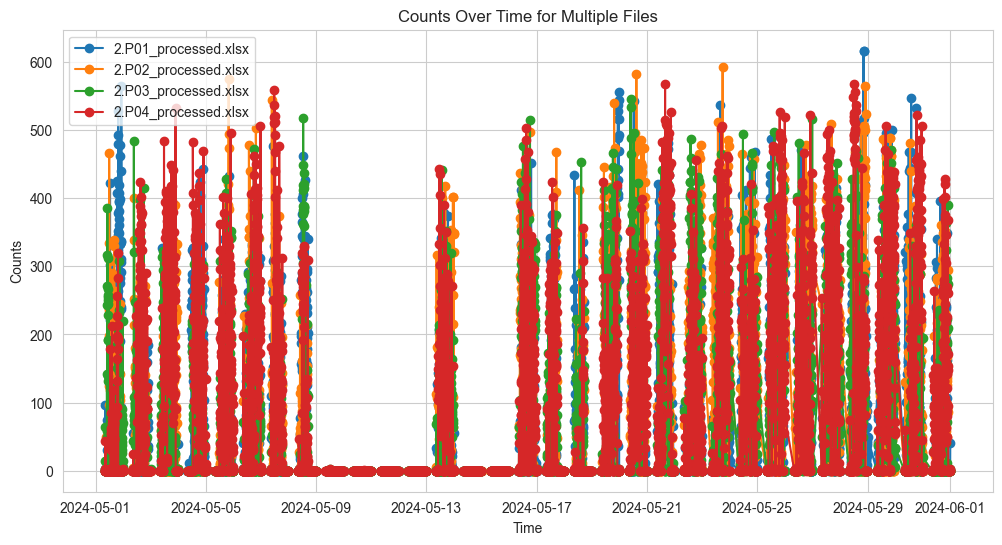

In [20]:
file_paths = ['Data_clean/Alta_sensors/2.P01_processed.xlsx', 'Data_clean/Alta_sensors/2.P02_processed.xlsx', 
              'Data_clean/Alta_sensors/2.P03_processed.xlsx', 'Data_clean/Alta_sensors/2.P04_processed.xlsx']

combined_df = pd.DataFrame()

for file_path in file_paths:
    df = pd.read_excel(file_path, sheet_name='Sheet1')
    df['Date'] = pd.to_datetime(df['Date'])
    df['Source'] = file_path.split('/')[-1]  
    combined_df = pd.concat([combined_df, df])

plt.figure(figsize=(12, 6))
for source, group in combined_df.groupby('Source'):
    plt.plot(group['Date'], group['Count'], marker='o', label=source)

plt.title('Counts Over Time for Multiple Files')
plt.xlabel('Time')
plt.ylabel('Counts')
plt.legend()
plt.grid(True)
plt.show()

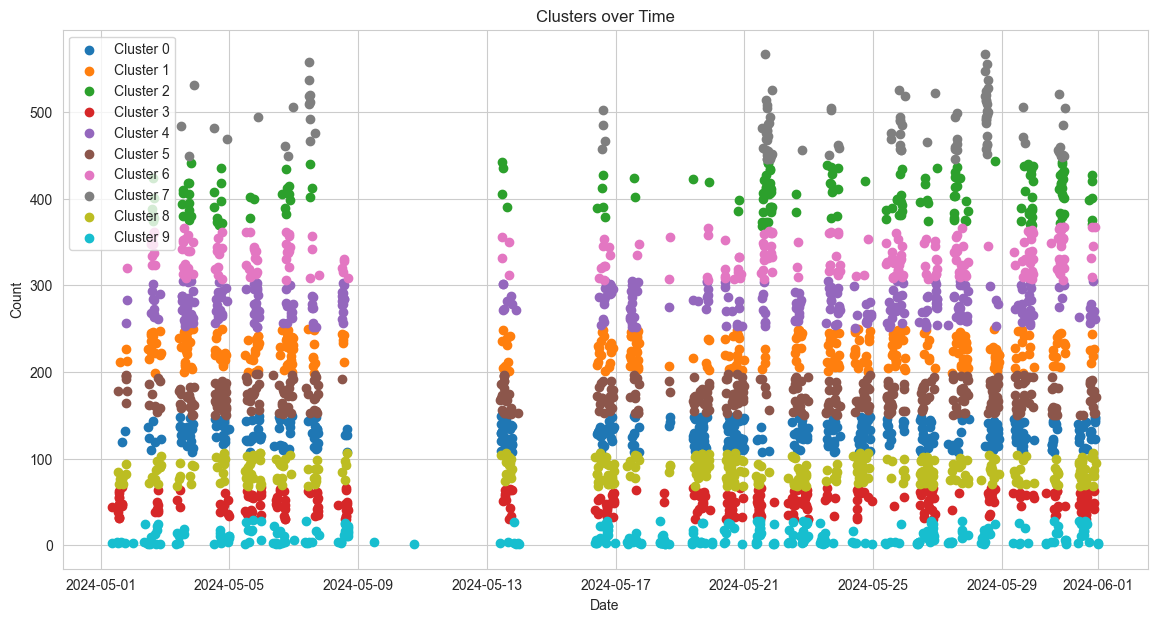

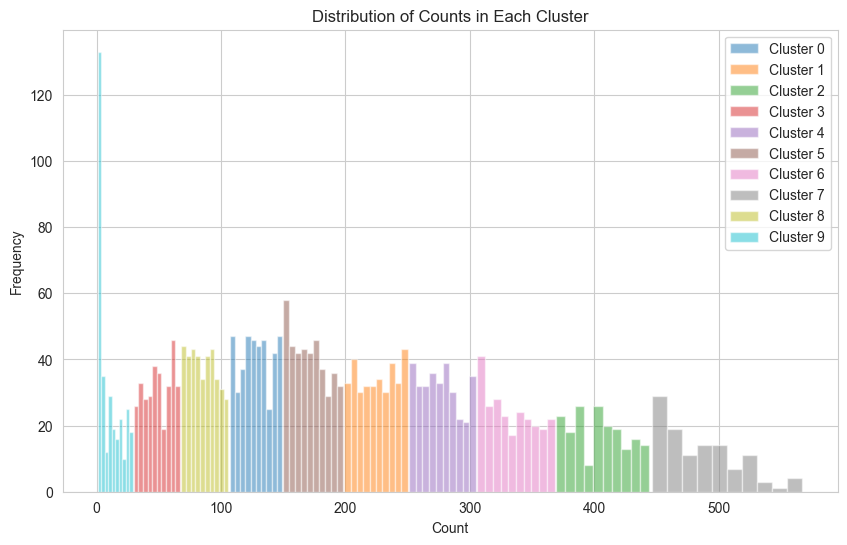

In [21]:

from sklearn.cluster import KMeans
df['Date'] = pd.to_datetime(df['Date'])
df = df.dropna(how='any')
df = df[df['Count'] != 0]
X = df[['Count']]
num_bins = 10
kmeans = KMeans(n_clusters=num_bins, random_state=42)

kmeans.fit(X)

cluster_labels = kmeans.labels_

df['Cluster'] = cluster_labels

plt.figure(figsize=(14, 7))

for cluster in range(num_bins):
    clustered_data = df[df['Cluster'] == cluster]
    plt.scatter(clustered_data['Date'], clustered_data['Count'], label=f'Cluster {cluster}')

plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Clusters over Time')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))

for cluster in range(num_bins):
    clustered_data = df[df['Cluster'] == cluster]
    plt.hist(clustered_data['Count'], bins=10, alpha=0.5, label=f'Cluster {cluster}')

plt.xlabel('Count')
plt.ylabel('Frequency')
plt.title('Distribution of Counts in Each Cluster')
plt.legend()
plt.show()

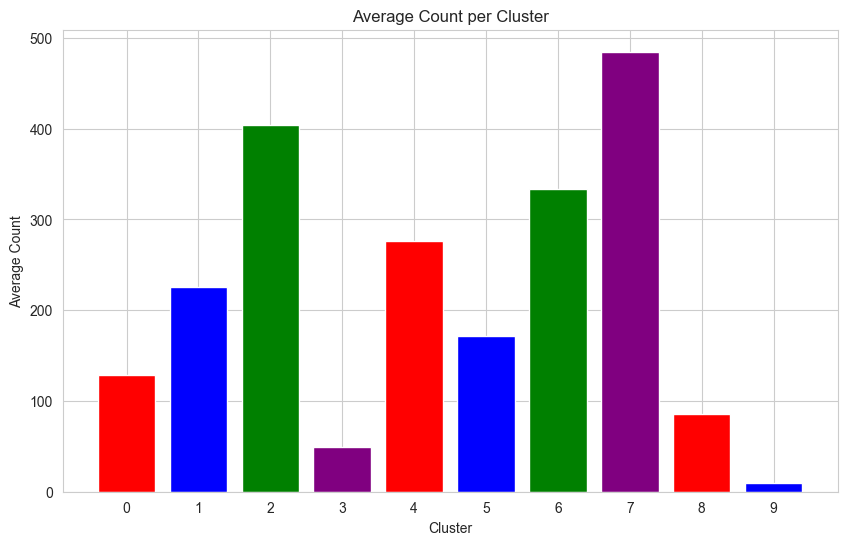

In [22]:
# Aggregate data by cluster
cluster_summary = df.groupby('Cluster').agg({'Count': 'mean'}).reset_index()

# Plot a bar plot
plt.figure(figsize=(10, 6))
plt.bar(cluster_summary['Cluster'], cluster_summary['Count'], color=['red', 'blue', 'green', 'purple'])

plt.xlabel('Cluster')
plt.ylabel('Average Count')
plt.title('Average Count per Cluster')
plt.xticks(cluster_summary['Cluster'])
plt.show()
